In [2]:
import cirq
import pennylane as qml
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

simulator = AerSimulator()

In [3]:
print(qiskit.version.get_version_info())

2.3.0


In [4]:
print(cirq.__version__)

1.5.0


In [5]:
print(qml.version())

0.42.3


# Tasks
- create a circuit with H-gate and Z-gate acting on the first qubit;
- create a circuit with X-gate and H-gate acting on the second qubit;
- create the Bell states
- extract the final state vector (before any measurement) and create a frequency plot from sampling the circuits 100 times

## Qiskit

In [6]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.z(0)
qc1.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘
q_1: ──────────

In [7]:
qc2 = QuantumCircuit(2)
qc2.x(1)
qc2.h(1)
qc2.draw()

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

In [8]:
bell1 = QuantumCircuit(2)
bell1.h(0)
bell1.cx(0,1)
bell1.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [9]:
bell2 = QuantumCircuit(2)
bell2.h(0)
bell2.cx(0,1)
bell2.cz(0,1)
bell2.draw()

┌───┐        
q_0: ┤ H ├──■───■─
     └───┘┌─┴─┐ │ 
q_1: ─────┤ X ├─■─
          └───┘

In [10]:
bell3 = QuantumCircuit(2)
bell3.h(0)
bell3.x(1)
bell3.cx(0,1)
bell3.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [11]:
bell4 = QuantumCircuit(2)
bell4.h(0)
bell4.x(1)
bell4.cz(0,1)
bell4.cx(0,1)
bell4.draw()

┌───┐        
q_0: ┤ H ├─■───■──
     ├───┤ │ ┌─┴─┐
q_1: ┤ X ├─■─┤ X ├
     └───┘   └───┘

In [12]:
#circuit1 state vector
transpiled = transpile(qc1, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j],
            dims=(2, 2))


In [13]:
#circuit2 state vector
transpiled = transpile(qc2, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [14]:
#bell1 state vector
transpiled = transpile(bell1, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [15]:
#bell2 state vector
transpiled = transpile(bell2, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


In [16]:
#bell3 state vector
transpiled = transpile(bell3, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [17]:
#bell4 state vector
transpiled = transpile(bell4, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


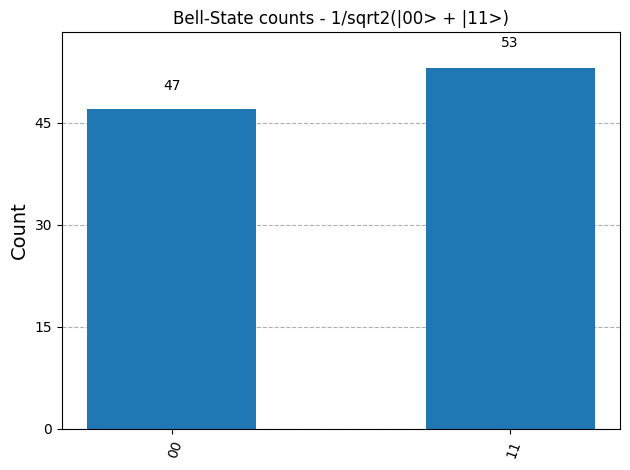

In [18]:
#bell1
bell1.measure_all()
circ = transpile(bell1, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|00> + |11>)')

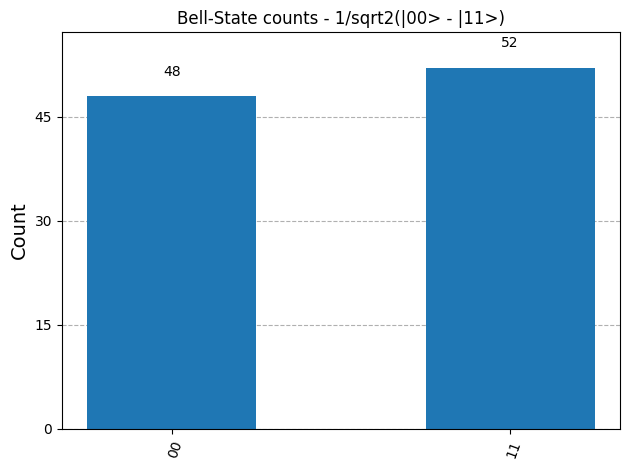

In [19]:
#bell2
bell2.measure_all()
circ = transpile(bell2, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|00> - |11>)')

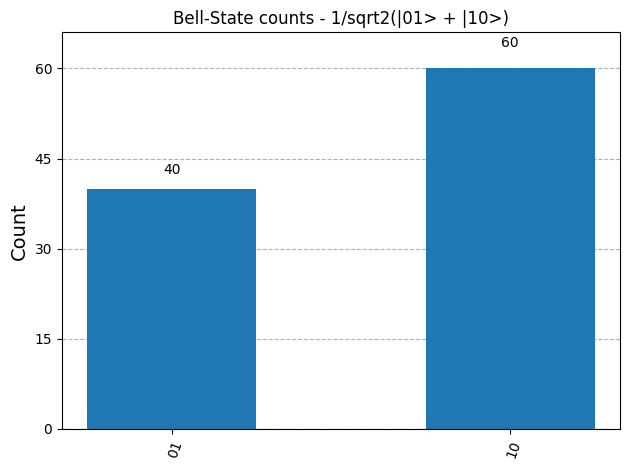

In [20]:
#bell3
bell3.measure_all()
circ = transpile(bell3, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|01> + |10>)')

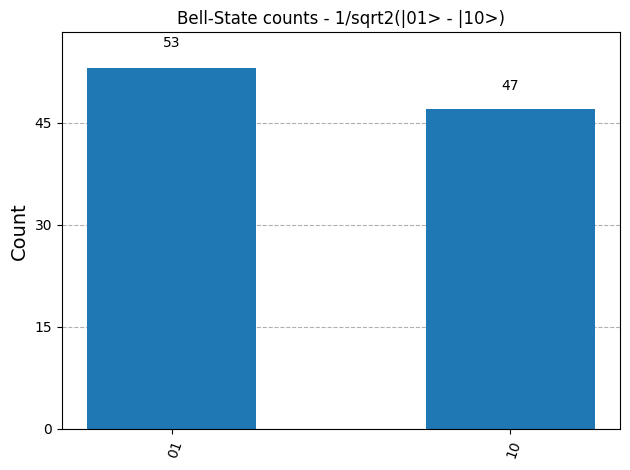

In [21]:
#bell4
bell4.measure_all()
circ = transpile(bell4, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|01> - |10>)')

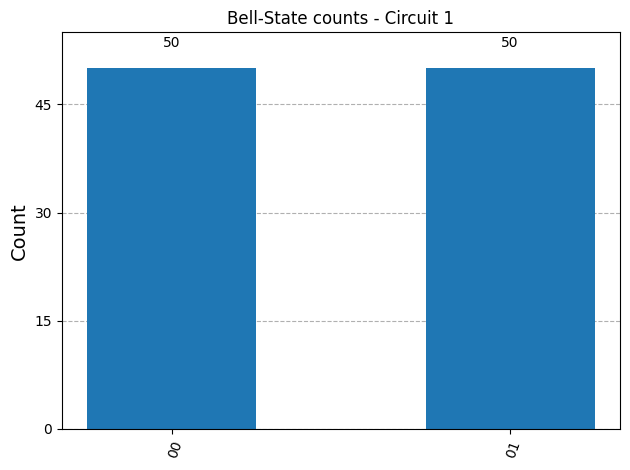

In [22]:
#circuit1
qc1.measure_all()
circ = transpile(qc1, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - Circuit 1')

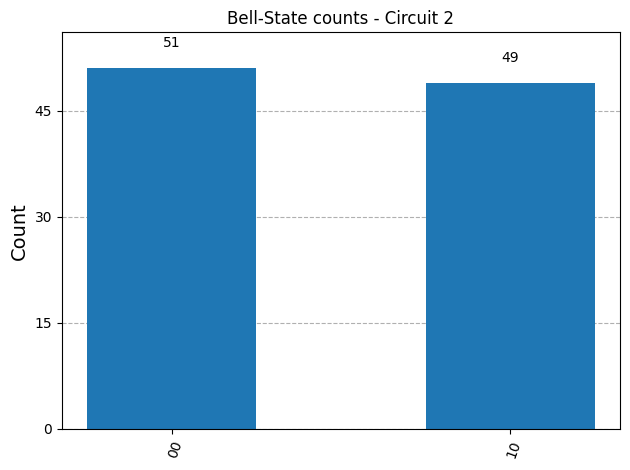

In [23]:
#circuit2
qc2.measure_all()
circ = transpile(qc2, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - Circuit 2')

## Cirq

In [24]:
qubits = cirq.GridQubit.square(2)
circuit1 = cirq.Circuit(cirq.H(qubits[0]), cirq.Z(qubits[0]))
print(circuit1)

(0, 0): ───H───Z───


In [25]:
qubits = cirq.GridQubit.square(2)
circuit2 = cirq.Circuit(cirq.X(qubits[1]), cirq.H(qubits[1]))
print(circuit2)

(0, 1): ───X───H───


In [26]:
qubits = cirq.GridQubit.square(2)
cx = cirq.CX(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([h])
moment1 = cirq.Moment([cx])
bell1 = cirq.Circuit((moment0, moment1))
print(bell1)

(0, 0): ───H───@───
               │
(0, 1): ───────X───


In [27]:
qubits = cirq.GridQubit.square(2)
cx = cirq.CX(qubits[0], qubits[1])
cz = cirq.CZ(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([h])
moment1 = cirq.Moment([cx])
moment2 = cirq.Moment([cz])
bell2 = cirq.Circuit((moment0, moment1, moment2))
print(bell2)

(0, 0): ───H───@───@───
               │   │
(0, 1): ───────X───@───


In [28]:
qubits = cirq.GridQubit.square(2)
x = cirq.X(qubits[1])
cx = cirq.CX(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([x, h])
moment1 = cirq.Moment([cx])
bell3 = cirq.Circuit((moment0, moment1))
print(bell3)

(0, 0): ───H───@───
               │
(0, 1): ───X───X───


In [29]:
qubits = cirq.GridQubit.square(2)
x = cirq.X(qubits[1])
cx = cirq.CX(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([x, h])
moment1 = cirq.Moment([cz])
moment2 = cirq.Moment([cx])

bell4 = cirq.Circuit((moment0, moment1, moment2))
print(bell4)

(0, 0): ───H───@───@───
               │   │
(0, 1): ───X───@───X───


In [30]:
cirq.final_state_vector(circuit1)

array([ 0.70710677+0.j, -0.70710677+0.j], dtype=complex64)

In [31]:
cirq.final_state_vector(circuit2)

array([ 0.70710677+0.j, -0.70710677+0.j], dtype=complex64)

In [32]:
cirq.final_state_vector(bell1)

array([0.70710677+0.j, 0.        +0.j, 0.        +0.j, 0.70710677+0.j],
      dtype=complex64)

In [33]:
cirq.final_state_vector(bell2)

array([ 0.70710677+0.j,  0.        +0.j,  0.        +0.j, -0.70710677+0.j],
      dtype=complex64)

In [34]:
cirq.final_state_vector(bell3)

array([0.        +0.j, 0.70710677+0.j, 0.70710677+0.j, 0.        +0.j],
      dtype=complex64)

In [35]:
cirq.final_state_vector(bell4)

array([ 0.        +0.j,  0.70710677+0.j, -0.70710677+0.j,  0.        +0.j],
      dtype=complex64)

In [36]:
simulator = cirq.Simulator()

In [37]:
circuit1.append(cirq.measure(qubits[0], qubits[1]))
circuit2.append(cirq.measure(qubits[0], qubits[1]))
bell1.append(cirq.measure(qubits[0], qubits[1]))
bell2.append(cirq.measure(qubits[0], qubits[1]))
bell3.append(cirq.measure(qubits[0], qubits[1]))
bell4.append(cirq.measure(qubits[0], qubits[1]))

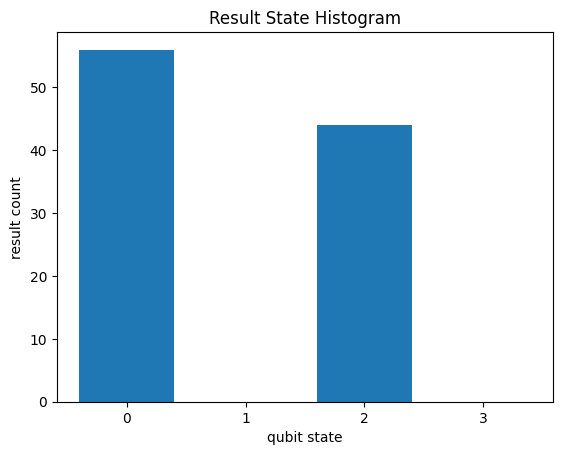

In [38]:
# circuit 1 histogram
result = simulator.run(circuit1, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

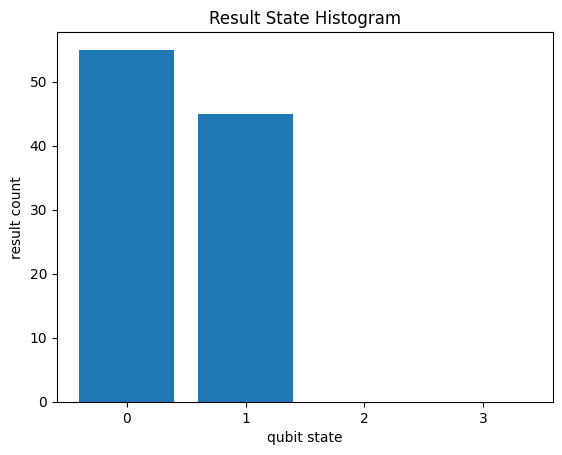

In [39]:
# circuit 2 histogram
result = simulator.run(circuit2, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

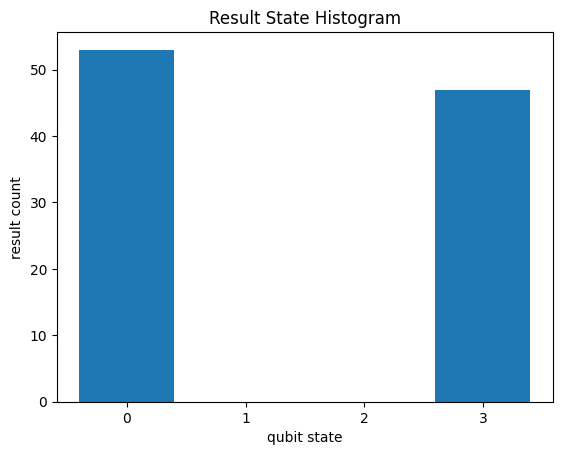

In [40]:
# bell1 histogram
result = simulator.run(bell1, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

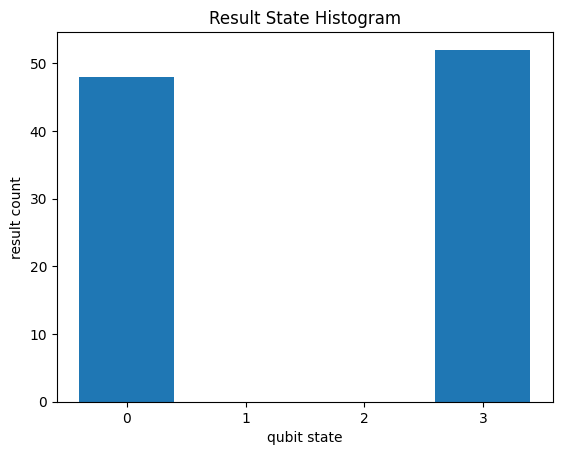

In [41]:
# bell2 histogram
result = simulator.run(bell2, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

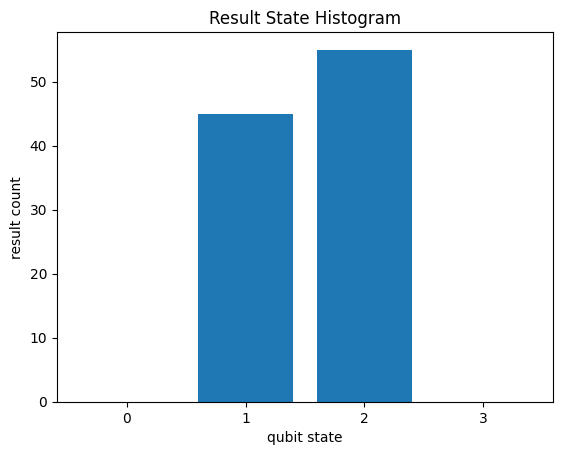

In [42]:
# bell3 histogram
result = simulator.run(bell3, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

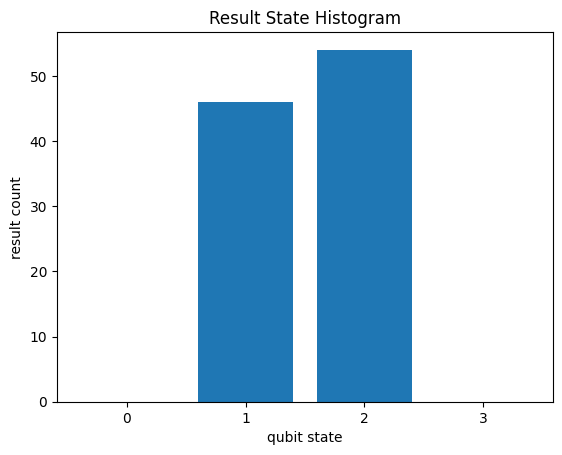

In [43]:
# bell4 histogram
result = simulator.run(bell4, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Pennylane

In [153]:
dev = qml.device("default.qubit", wires=2, shots=100)

@qml.qnode(dev)
def circuit1_fn():
    qml.H(wires=0)
    qml.Z(wires=0)
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))



@qml.qnode(dev)
def circuit2_fn():
    qml.X(wires=1)
    qml.H(wires=1)
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell1_fn():
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell2_fn():
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    qml.CZ(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell3_fn():
    qml.H(wires=0)
    qml.X(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell4_fn():
    qml.H(wires=0)
    qml.X(wires=1)
    qml.CZ(wires=[1,0])
    qml.CNOT(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])
circuit1 = qml.QNode(circuit1_fn, dev_unique_wires)
circuit2 = qml.QNode(circuit2_fn, dev_unique_wires)
bell1 = qml.QNode(bell1_fn, dev_unique_wires)
bell2 = qml.QNode(bell2_fn, dev_unique_wires)
bell3 = qml.QNode(bell3_fn, dev_unique_wires)
bell4 = qml.QNode(bell4_fn, dev_unique_wires)

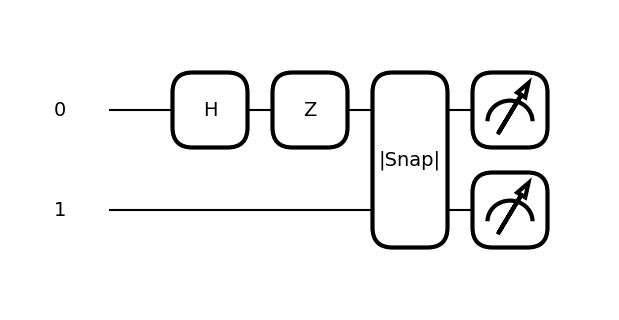

In [154]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit1)()
plt.show()

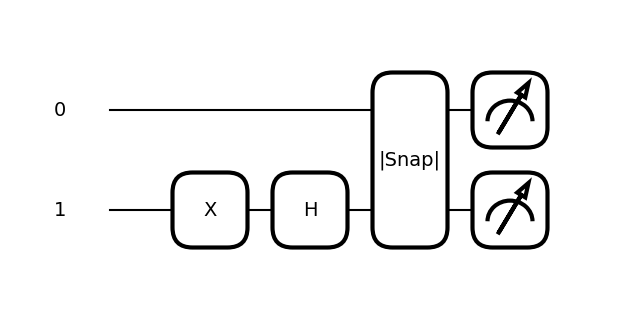

In [155]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit2)()
plt.show()

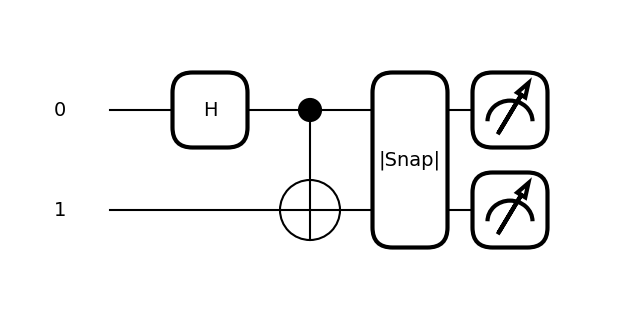

In [156]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell1)()
plt.show()

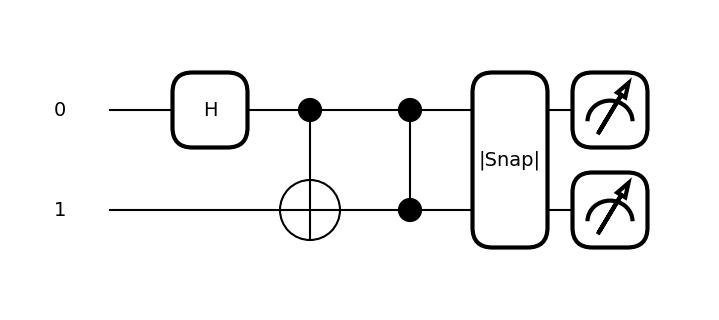

In [157]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell2)()
plt.show()

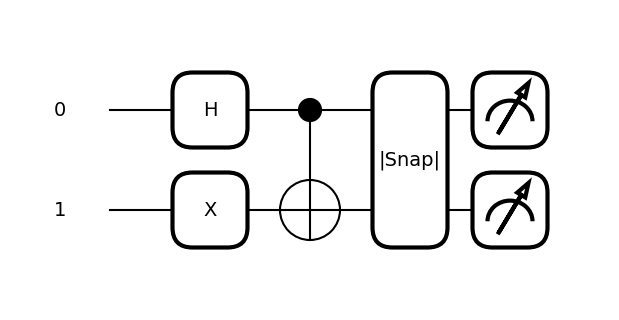

In [158]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell3)()
plt.show()

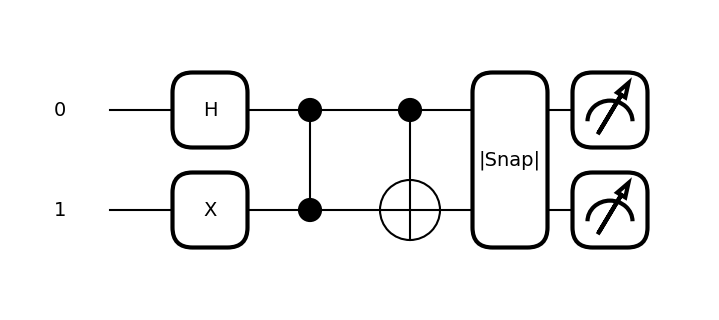

In [159]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell4)()
plt.show()

In [171]:
# circuit1 state
qml.snapshots(circuit1)()["s"]

array([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j, -0.        +0.j])

In [172]:
# circuit2 state
qml.snapshots(circuit2)()["s"]

array([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,  0.        +0.j])

In [173]:
# bell1 state
qml.snapshots(bell1)()["s"]

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [174]:
# bell2 state
qml.snapshots(bell2)()["s"]

array([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j, -0.70710678+0.j])

In [175]:
# bell3 state
qml.snapshots(bell3)()["s"]

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [176]:
# bell4 state
qml.snapshots(bell4)()["s"]

array([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.        +0.j])

In [181]:
circuit1_samples = circuit1()[0]
circuit2_samples = circuit2()[0]
bell1_samples = bell1()[0]
bell2_samples = bell2()[0]
bell3_samples = bell3()[0]
bell4_samples = bell4()[0]
samples = [circuit1_samples, circuit2_samples, bell1_samples, bell2_samples, bell3_samples, bell4_samples]

In [188]:
def bar_graph(sample):
    plt.figure(figsize=(7, 5))

    # Sort keys so the x-axis is always in order (00, 01, 10, 11)
    labels = sorted(sample.keys())
    values = [sample[k] for k in labels]

    bars = plt.bar(labels, values, color='skyblue', edgecolor='navy')

    # Styling
    plt.title("Measurement Results (100 Shots)", fontsize=14)
    plt.xlabel("State", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.ylim(0, max(values) + 20) # Extra room for text

    # Add numeric labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{int(yval)}', ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()
        
    

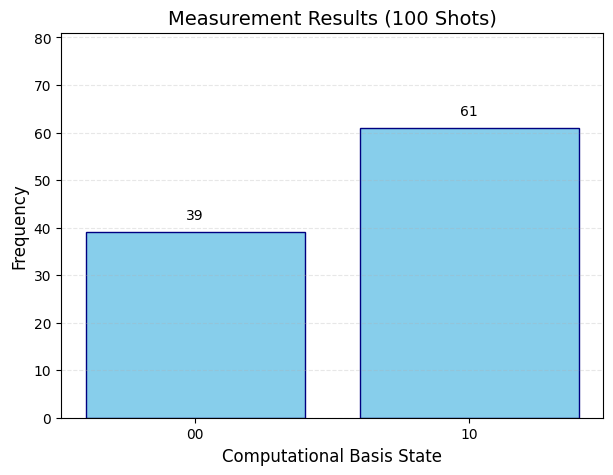

In [187]:
bar_graph(circuit1_samples)

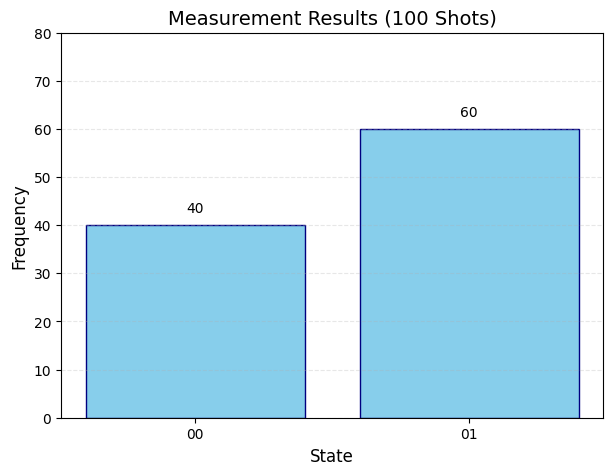

In [189]:
bar_graph(circuit2_samples)

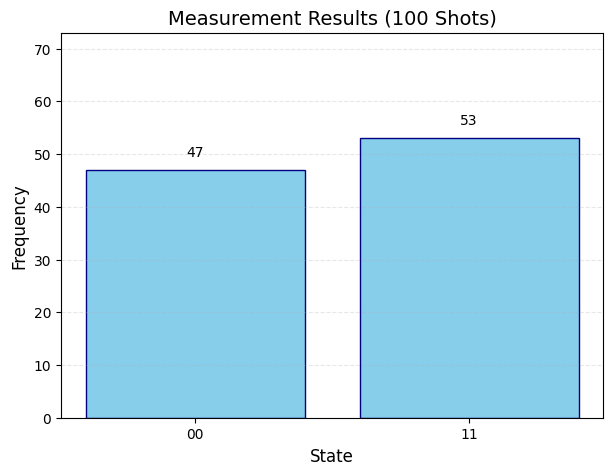

In [190]:
bar_graph(bell1_samples)

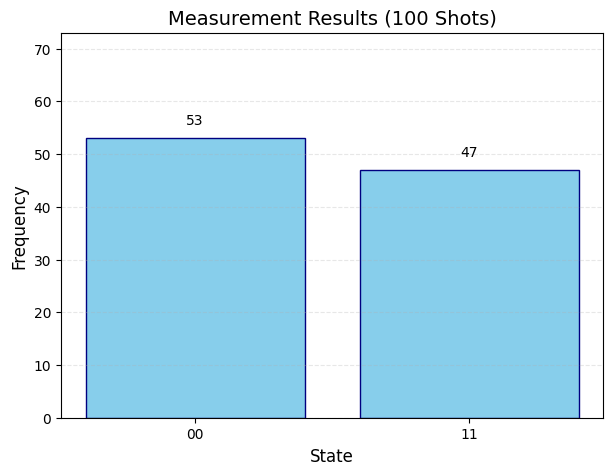

In [191]:
bar_graph(bell2_samples)

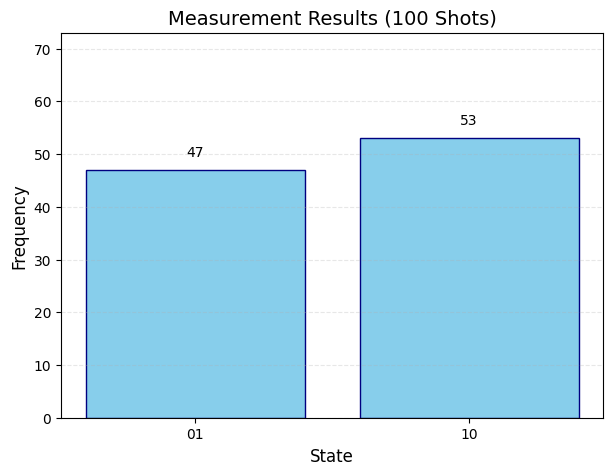

In [192]:
bar_graph(bell3_samples)

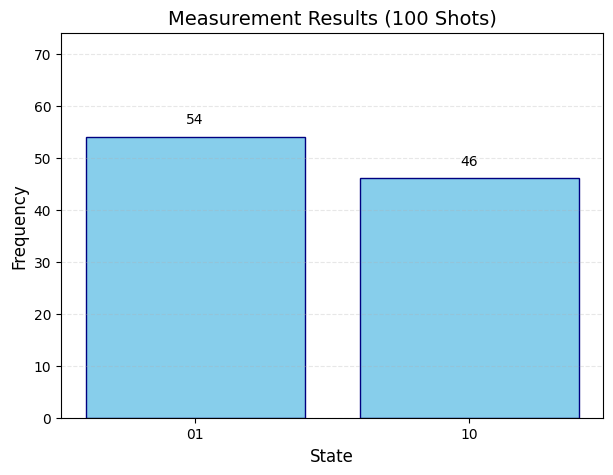

In [193]:
bar_graph(bell4_samples)

# Differences between frameworks
- Cirq and Pennylane drop wires that are unused. You must do something with them (measure/take a snapshot) in order to have them show up on the circuit diagram
- Pennylane represents measurement as taking the expectation value of a wire
- Pennylane treats circuits not as objects, but as fucntions. Pennylane uses the QNode represntation.
- Pennylane's Qnodes can be in several different modes, including analytic (for developing & testing outcomes) and shot-based (for simulating many outcomes)
- When displaying the histogram of measurements, cirq keeps track of the unused states (and displays them with a magnitude of 0)

# GHZ State

## Tasks

Create a GHZ state of 6 qubits using QISkit or Cirq. Obtain frequency plots for 10,000 samples when

- sample on qiskit aer wihtout noise and with simple noise

- sample on the "ionq_simulator" backend for ideal quantum devices and with noise models "aria-1" and "forte-1"

- sample on a real quantum computer ("ionq_qpu.forte-1") with and without error-mitigation.

- Using your IBMQE account, find the least busy IBM quantum device, then i) perform the sampling on this quantum device and ii) simulate the sampling using the QISkit noise model for this quantum device.

In [198]:
ghz = QuantumCircuit(6)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)
ghz.cx(0,3)
ghz.cx(0,4)
ghz.cx(0,5)
ghz.draw()

┌───┐                         
q_0: ┤ H ├──■────■────■────■────■──
     └───┘┌─┴─┐  │    │    │    │  
q_1: ─────┤ X ├──┼────┼────┼────┼──
          └───┘┌─┴─┐  │    │    │  
q_2: ──────────┤ X ├──┼────┼────┼──
               └───┘┌─┴─┐  │    │  
q_3: ───────────────┤ X ├──┼────┼──
                    └───┘┌─┴─┐  │  
q_4: ────────────────────┤ X ├──┼──
                         └───┘┌─┴─┐
q_5: ─────────────────────────┤ X ├
                              └───┘